### ✅ **Session 3 – Quadratic Programming (QP)**

### 📦 **What is QP?**

In **Quadratic Programming**, the objective function includes squared terms or cross-product terms. These are common in problems like:

✔ Minimizing cost where penalties grow faster than linearly
✔ Portfolio optimization where variance (risk) is quadratic
✔ Energy usage where power loss is proportional to the square of current

---

### 📦 **Example Problem – Minimize Cost with Quadratic Terms**

**Problem Statement:**
You want to decide production quantities for products `A` and `B` such that the total cost is minimized.

* The cost includes a fixed cost plus a quadratic penalty that grows with the amount produced.

Cost function:

$$
\text{Cost} = 5x + 3y + 2x^2 + y^2
$$

**Constraints:**

* $x + y \geq 10$
* $x \geq 0, y \geq 0$

The quadratic terms $2x^2$ and $y^2$ represent increasing penalties as production rises.

---

Ipopt 3.5.4: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Common Public License (CPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

NOTE: You are using Ipopt by default with the MUMPS linear solver.
      Other linear solvers might be more efficient (see Ipopt documentation).


This is Ipopt version 3.5.4, running with linear solver mumps.

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        2
                variables with lower and upper bounds:        0
   

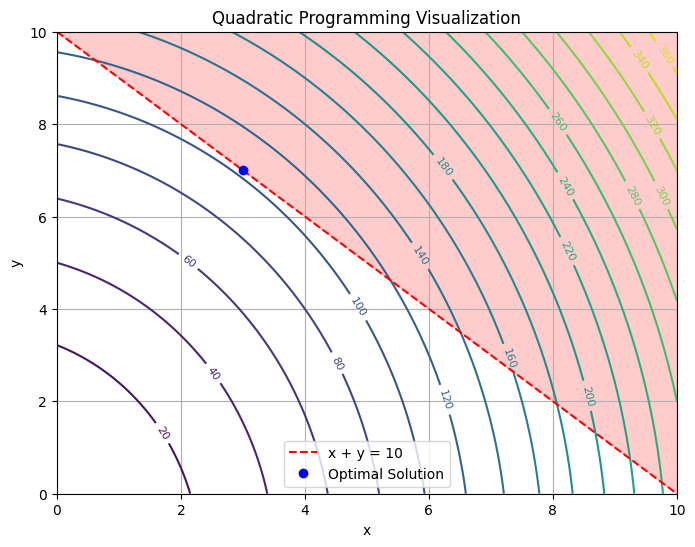

In [1]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, NonNegativeReals, minimize
import matplotlib.pyplot as plt
import numpy as np

# Create model
model = ConcreteModel()
model.x = Var(domain=NonNegativeReals)
model.y = Var(domain=NonNegativeReals)

# Objective – minimize cost
model.cost = Objective(expr = 5 * model.x + 3 * model.y + 2 * model.x**2 + model.y**2, sense=minimize)

# Constraints
model.constraint1 = Constraint(expr = model.x + model.y >= 10)

# Solve using IPOPT
solver = SolverFactory('ipopt')
result = solver.solve(model, tee=True)

# Print results
print("Optimal x:", model.x.value)
print("Optimal y:", model.y.value)
print("Minimum Cost:", model.cost())

# Plotting
x_vals = np.linspace(0, 10, 100)
y_vals = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Cost function Z = 5x + 3y + 2x^2 + y^2
Z = 5 * X + 3 * Y + 2 * X**2 + Y**2

plt.figure(figsize=(8,6))

# Contour plot of the cost function
contours = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Plot constraint line: x + y = 10
y_constraint = 10 - x_vals
plt.plot(x_vals, y_constraint, 'r--', label="x + y = 10")

# Shade feasible region where x + y >= 10
plt.fill_between(x_vals, y_constraint, 10, where=(y_constraint <= 10), color='red', alpha=0.2)

# Plot optimal solution
plt.plot(model.x.value, model.y.value, 'bo', label="Optimal Solution")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Programming Visualization')
plt.legend()
plt.grid(True)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()
